<a href="https://colab.research.google.com/github/thenaivekid/ocr-using-tesseract/blob/main/pytesseract_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install pytesseract

In [2]:
# !apt install tesseract-ocr


In [3]:
# pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

In [4]:
# from google.colab import drive
# drive.mount('content/')

In [5]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

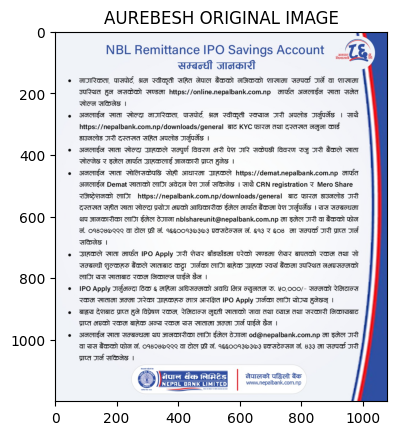

In [24]:
# IMG_DIR = '/content/content/MyDrive/images/'
IMG_DIR = ''
image = cv2.imread(IMG_DIR + 'ocr_test1.jpg')
# image = cv2.imread(IMG_DIR + 'digits-task.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [87]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    # return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# don't use functions below me 
#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [89]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    # return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

def remove_background(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    return cv2.bitwise_and(image, image, mask=opening) 

def enhance_contrast(image):
    return cv2.equalizeHist(image)

def keep_sharp_edge(image):
    return cv2.bilateralFilter(image, 9, 75, 75)

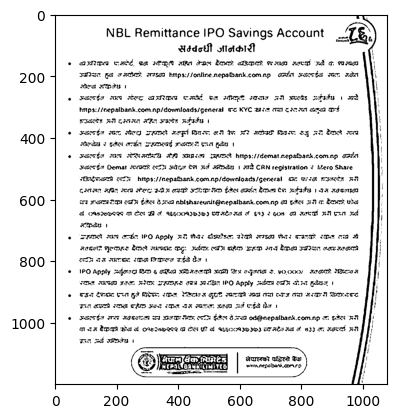

In [90]:
image = cv2.imread('ocr_test1.jpg')
image = get_grayscale(image)
image = remove_noise(image)
image = thresholding(image)
plt.imshow(keep_sharp_edge(image),cmap='gray')

In [101]:

def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    bg_removed = cv2.bitwise_and(image, image, mask=opening)
    # contrast_enhanced = cv2.equalizeHist(bg_removed)
    
    sharp_edge = cv2.bilateralFilter(image, 9, 75, 75)
    return sharp_edge

def show_image(image):
    plt.axis('off')
    plt.imshow(image,cmap='gray')

In [102]:
def get_text_from_image(image):
    custom_config = r'-l eng+nep --oem 3 --psm 6'
    text = pytesseract.image_to_string(image, config=custom_config)
    return text

In [104]:
def pipeline(image_path):
    image = cv2.imread(image_path)
    image = preprocess(image)
    show_image(image)
    print(get_text_from_image(image))

PENCAK SILAT DAN PENDIDIKAN KARAKTER
Oleh: Hasbi Habibi
(Sekretaris Paguron Aom Tur' at Ciamis)

Pencak silat sebagai bagian dari kebudayaan bangsa Indonesia berkembang
sejalan dengan sejarah masyarakat Indonesia dari hasil budi daya manusia yang turun
temurun, yang bertujuan untuk menjamin keamanan dan kesejahteraan bersama. Ia
merupakan bagian dari kebudayaan dan peradaban manusia yang diajarkan kepada
masyarakat yang meminatinya Dengan aneka ragam situasi geografis dan etnologis
serta perkembangan zaman yang dialami oleh bangsa Indonesia, Pencak Silat
dibentuk oleh situasi dan kondisinya. Kini Pencak Silat kita kenal dengan wujud dan
corak yang beraneka ragam, namun mempunyai aspek-aspek yang sama.

Dalam Pasal 4 Undang-Undang Republik Indonesia Nomor 23 tahun 2005
tentang sistem Keolahragaan Nasional disebutkan, * Keolahragaan nasional bertujuan
memelihara dan meningkatkan kesehatan dan kebugaran, prestasi, kualitas manusia,
menambah nilai moral dan akhlak mulia, sportivitas, disip

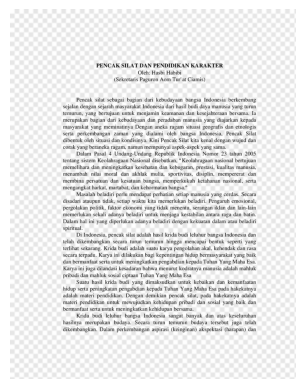

In [105]:
pipeline('ocr_test3.jpg')

(1159, 820)


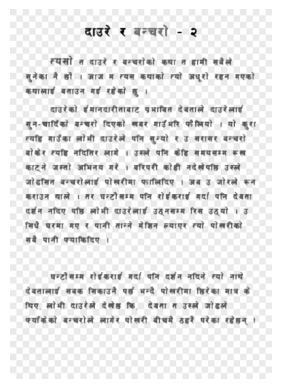

In [43]:
image = cv2.imread(IMG_DIR + 'ocr_test2.jpg')
gray_img = get_grayscale(image)
denoised = remove_noise(gray_img)
print(denoised.shape)

plt.axis('off')
plt.imshow(denoised, cmap='gray')

In [32]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

# gray = get_grayscale(image)
# thresholding_ = thresholding(gray)
# opening_ = opening(gray)
# canny_ = canny(gray)
# rm_noise = remove_noise(gray)
# dilate_ = dilate(gray)
# erode_ = erode(gray)
# deskew_ = deskew(gray)


# images = {'gray': gray,
#         'thresh': thresholding_,
#         'opening': opening,
#         'canny': canny,
#         'rm_noise': rm_noise,
#         'dilate': dilate_,
#         'erode': erode_,
#         'deskew': deskew_,
#         }

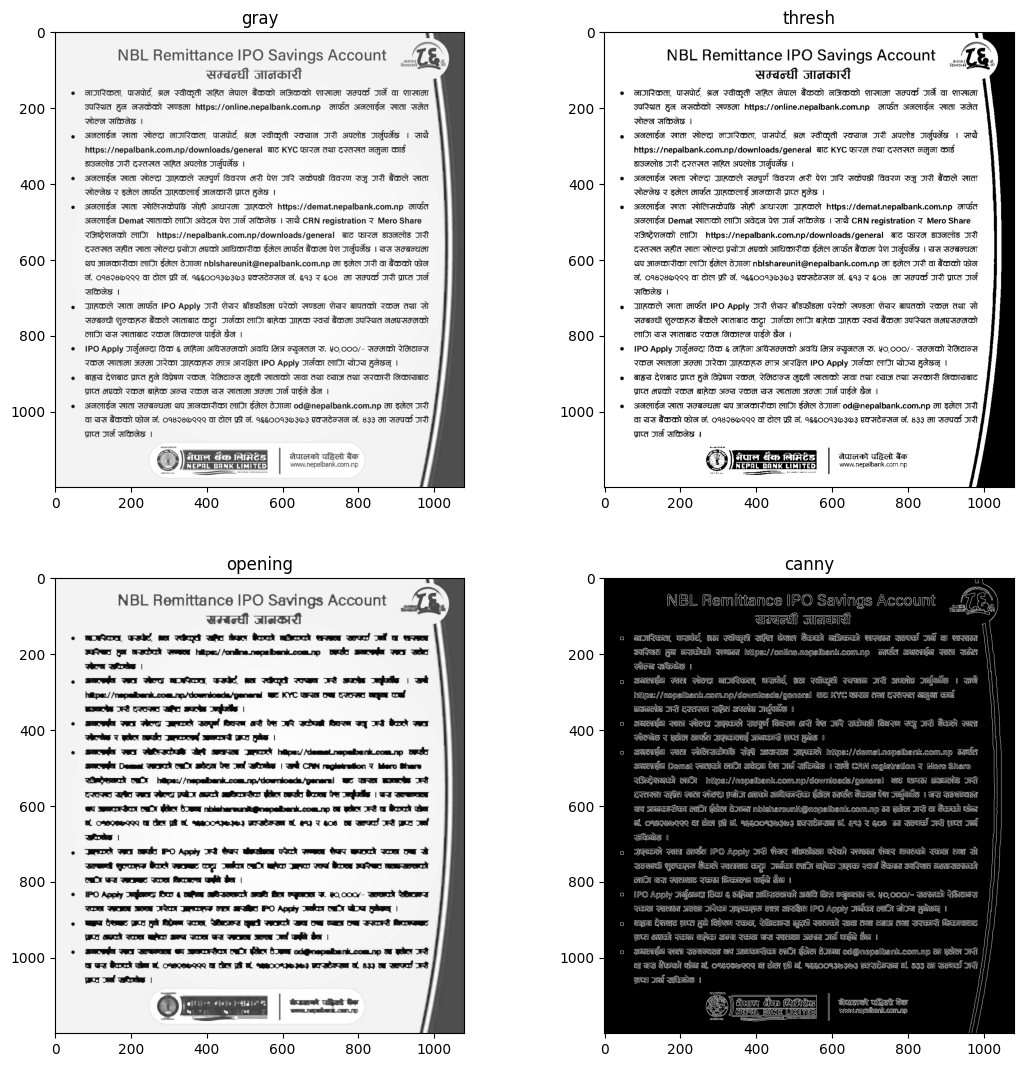

In [33]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [10]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
i
NBL Remittance IPO Savings Account AMS.
Aedowl sHotaret

© aRe@a, ute so Soe waa suet Soot aseMes MAEM WsuEs Teh aT ART
BORAT Fat TAB Ws https://online.nepalbank.com.np BBA socIsat WIT Asia
Beat Usa |

° Soca VI Vea aR, we sot Sdogt erent IN sucis seuss 1 wat
https://nepalbank.com.np/downloads/general @I¢ KYC BRA Aa GLAVIA sigfoi os
SACHS INT GCA Aaa sacs Tress |

© Fong VI Biecl IRM Bayuh fAaxor okt ter WI aust Aart Sy INT Saoer rca
WSSAS I STI TTA TAMU TSC ICT BSS |

© Socio Vc Vieraures BAT sweat IEA! https://demat.nepalbank.com.np Gita
wacigat Demat Braesy CHT sracot er Sof wfeoars | Bet CRN registration < Mero Share
RBMeeaas! cmt https://nepalbank.com.np/downloads/general Sc WR sisccils INT
TROT AAT VAT VISE WATT away sures Sater GMs Seo ter refueks | Ba Besse
am stareprsten onfst Sater Sorat nbishareunit@nepalbank.com.np GM Sic INT aT SaaS Wier
GF. 098Q8ORQQ T

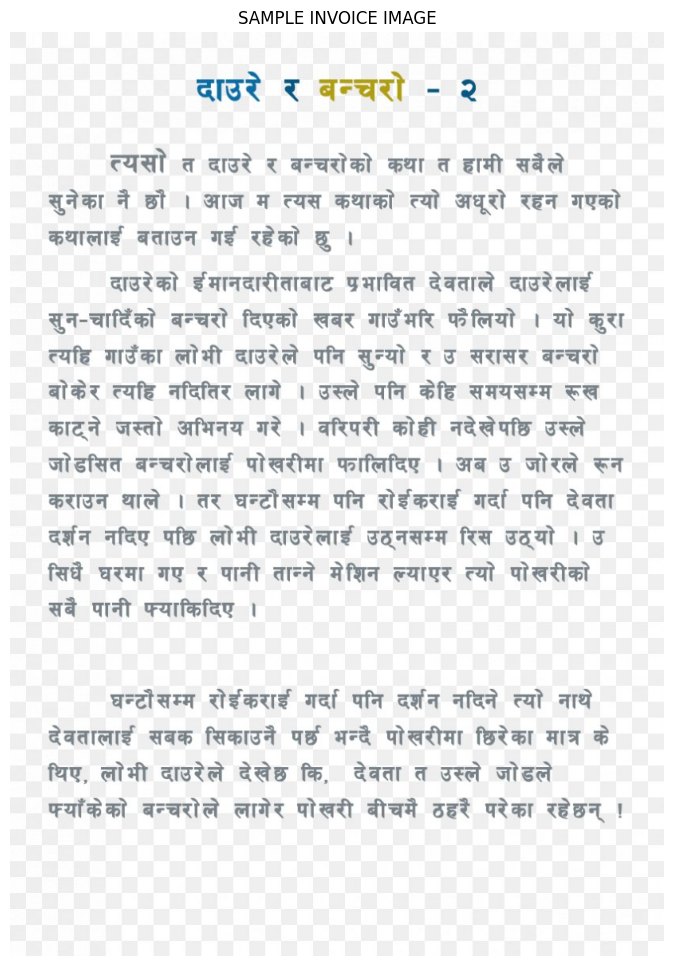

In [13]:
# Plot original image

image = cv2.imread(IMG_DIR + 'ocr_test2.jpg')
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.axis('off')
plt.show()

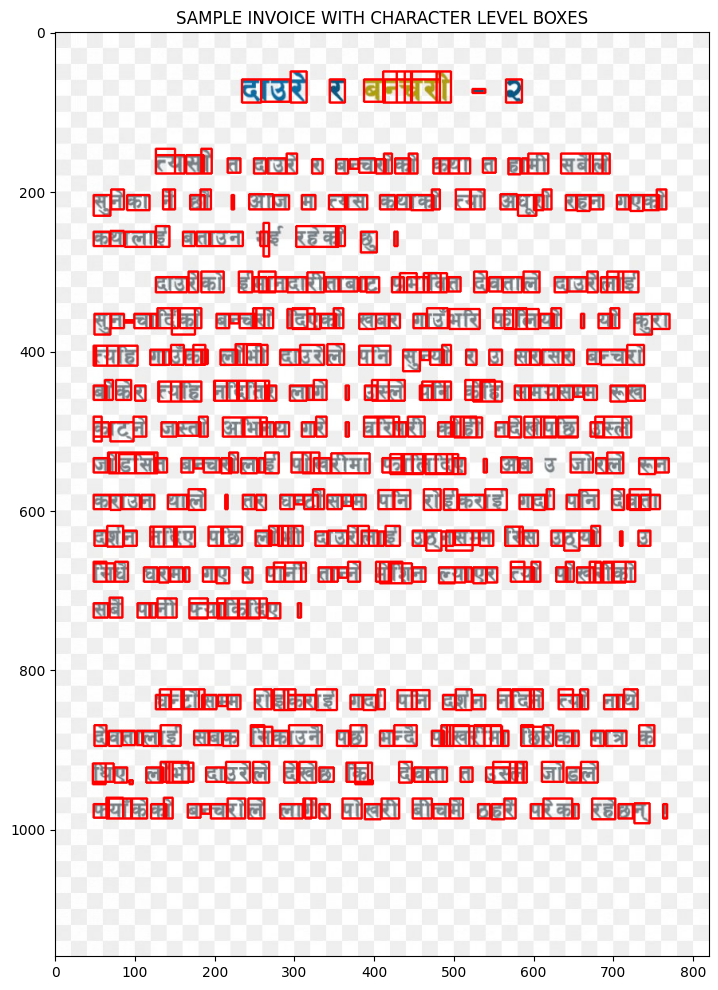

In [15]:
# Plot character boxes on image using pytesseract.image_to_boxes() function

image = cv2.imread(IMG_DIR + 'ocr_test2.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 0, 255), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

दाएरे र बन्चरो - २

त्यसो त दाएरे र बन्चरोको कथा त हामी सबैले
सुनेका नै छौ । आज म त्यस कथाको त्यो अधूरो रहन गएको
कथालाई बताउन गई रहेको छु ।

दाउरेको ईमानदारीताबाट प॒भावित देवताले दाउरेलाई
सुन-चादिँको बन्चरो दिएको खबर गाउँमरि पत्रैलियो । यो कूरा
त्यहि गाउँका लोभी दाउरेले पनि सुन्यो र उ सरासर बन्चरो
बोकेर त्यहि नदितिर लागे । उस्ले पनि केहि समयसम्म रुख
eer जस्तो अभिनय गरे । वरिपरी कोह्ठी नदेखेपछि उस्ले
जोडसित बन्चरोलाई पोखरीमा पत्रालिदिए । अब उ जोरले रून
कराउन थाले । तर घन्टौसम्म पनि रोईकराई गर्दा पनि देवता
दर्शन नदिए पछि लोमी दाएरेलाई उठ्नसम्म रिस उठ्यो । उ
सिधै घरमा गए र पानी तान्ने मेशिन ल्याएर त्यो पोखरीको
सबै पानी फ्याकिदिए ।

घन्टौसम्म रोईकराई गर्दा पनि दर्शन नदिने त्यो नाथे
देवतालाई सबक सिकाउने पर्छ भन्दै पोखरीमा छिरेका मात्र के
थिए, लोमी दाएउरेले देखेछ कि, देवता त उस्ले जोडले
फ्याँकेको बन्चरोले लागेर पोखरी बीचमै ठहरै परेका रहेछन्‌ !

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


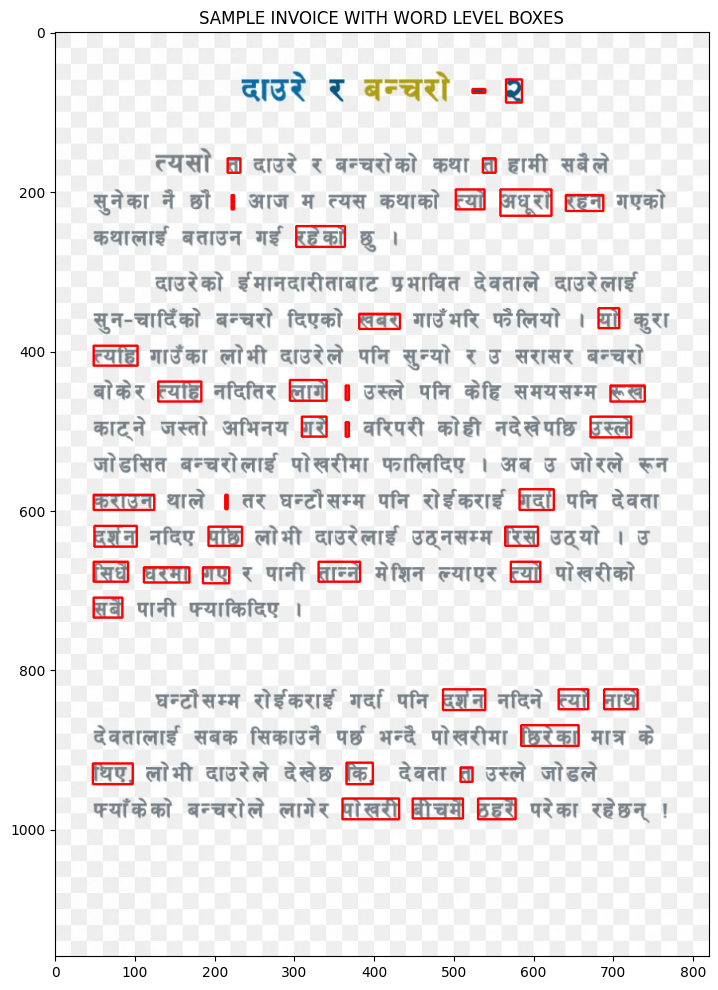

In [20]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread(IMG_DIR + 'ocr_test2.jpg')
custom_config = r'-l eng+nep --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

In [21]:
d['text']

['',
 '',
 '',
 '',
 'ast',
 '<',
 'aeaqel',
 '-',
 '2',
 '',
 '',
 '',
 'Taal',
 'a',
 'aet',
 '<',
 'aradtat',
 'sar',
 'a',
 'eri',
 'wat',
 '',
 'qia',
 '+t',
 'st',
 '1',
 'aT',
 'a',
 'cra',
 'saat',
 'cat',
 'Agel',
 'wea',
 'aVat',
 '',
 'Baas',
 'Aas',
 'TW',
 'at',
 '|',
 '1',
 '',
 '',
 '',
 'ate',
 'SarAataare',
 'sarfaa',
 'saat',
 'asters',
 '',
 'qa-afeat',
 'araet',
 'faust',
 'war',
 'mga',
 'wfeat',
 '1',
 'at',
 'Hz',
 '',
 'cafe',
 'wigart',
 'atat',
 'ate',
 'of',
 'Brat',
 '<o',
 'away',
 'aad',
 '',
 'atez',
 'cafe',
 'afafax',
 'art',
 '|',
 'set',
 'oft',
 'afe',
 'qaaara',
 'wa',
 '',
 'awed',
 'wet',
 'afaaa',
 'at',
 '1',
 'afead',
 'atet',
 'aeeufe',
 'set',
 '',
 'wtefaa',
 'aeatters',
 'what',
 'wifafar',
 '|',
 'wa',
 'Ota',
 'SA',
 '',
 'BUSA',
 'Ae',
 '|',
 'aT',
 'aretara',
 'ofa',
 'Wess',
 'Tal',
 'af',
 'eaar',
 '',
 'ava',
 'afay',
 'ofe',
 'atadt',
 'aeteare',
 'saaara',
 'fra',
 'gaat',
 '1c',
 '',
 'fad',
 'azar',
 'ay',
 '<',
 'oat',
 'area',


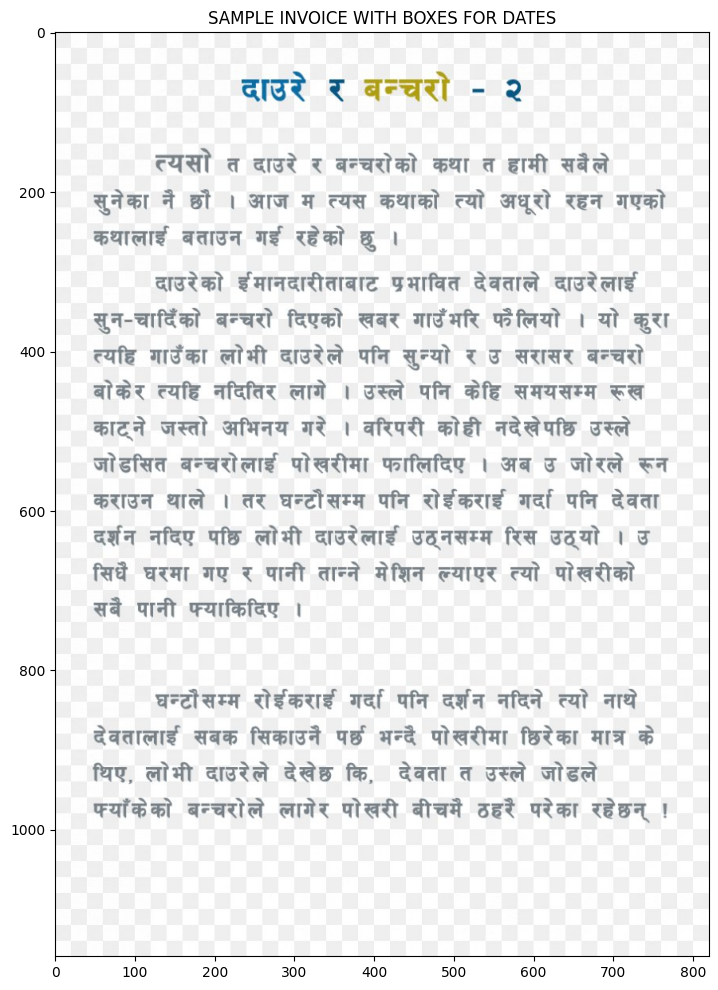

In [18]:
# Plot boxes around text that matches a certain regex template
# In this example we will extract the date from the sample invoice

image = cv2.imread(IMG_DIR + 'ocr_test2.jpg')
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH BOXES FOR DATES')
plt.show()

### Detect orientation and script

You can detect the orientation of text in your image and also the script in which it is written.

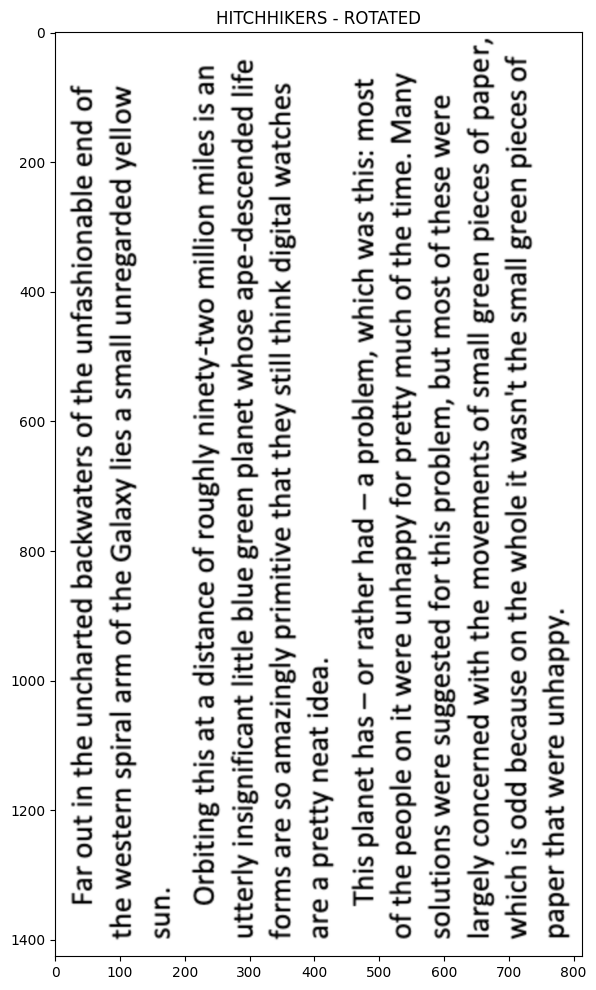

In [ ]:
# # Plot original image

# image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
# b,g,r = cv2.split(image)
# rgb_img = cv2.merge([r,g,b])
# plt.figure(figsize=(16,12))
# plt.imshow(rgb_img)
# plt.title('HITCHHIKERS - ROTATED')
# plt.show()

In [ ]:
# Get angle and script

osd = pytesseract.image_to_osd(image)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\w+', osd).group(0)
print("angle: ", angle)
print("script: ", script)

angle:  90
script:  Latin


### Playing around with the config

By making minor changes in the config file you can
- specify language
- detect only digits
- whitelist characters
- blacklist characters
- work with multiple languages

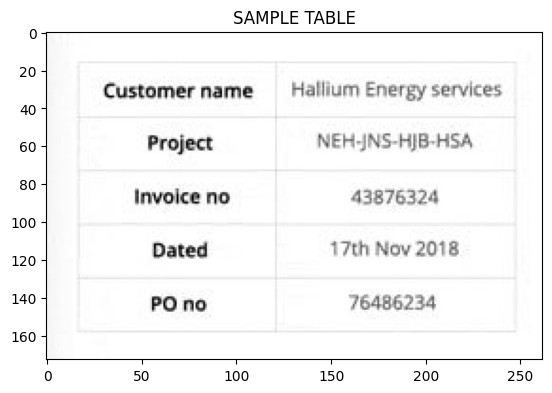

In [ ]:
# Plot original image

image = cv2.imread(IMG_DIR + 'digits-task.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()

In [ ]:
# Original tesseract output with english language sepcified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234



In [ ]:
# Output with outputbase digits

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=custom_config))

--

. 43876324
172018.
0 176496234



In [ ]:
# Output with a whitelist of characters (here, we have used all the lowercase characters from a to z only)

custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

customernamealiumnergyservices
roject e
lavoiceno
ated thov
ono



In [ ]:
# Output without the blacklisted characters (here, we have removed all digits)

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no ¢
Dated %h Nov%.
POno



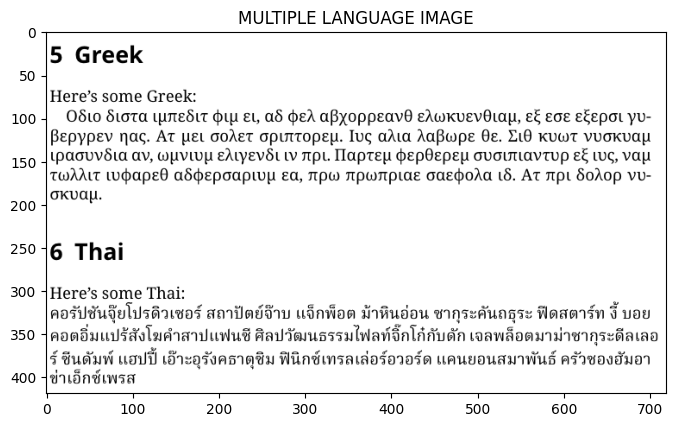

In [ ]:
# working with multiple languages

# Plot original image

image = cv2.imread(IMG_DIR + 'greek-thai.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(8,16))
plt.imshow(rgb_img, cmap = 'gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [ ]:
# Output with only english language specified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



In [ ]:
# Output with all languages specified

custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa

